In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [1]:
df=pd.read_csv(r"C:\Data\Projects\Covid Analysis\country_wise_latest.csv.xlsx")

NameError: name 'pd' is not defined

In [5]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Latitude,Longitude
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,33.939110,67.709953
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,41.153332,20.168331
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,28.033886,1.659626
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,42.546245,1.601554
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,-13.768752,-177.156097
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,24.215527,-12.885834
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,15.552727,48.516388
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,-13.133897,27.849332


In [6]:
total_confirm=df["Confirmed"].sum()

In [7]:
total_confirm

16480485

In [8]:
total_death=df["Deaths"].sum()
total_recover=df["Recovered"].sum()
total_active=df["Active"].sum()

In [9]:
total_death,total_recover,total_active

(654036, 9468087, 6358362)

In [10]:
index=df.index
count_rows=len(index)

In [11]:
count_rows

187

In [12]:
death_rate_sum=(df["Deaths / 100 Cases"].sum())
death_rate=death_rate_sum/count_rows

In [13]:
round(death_rate)

3.0

In [14]:
recover_rate=(df["Recovered / 100 Cases"].sum())/count_rows

In [15]:
round(recover_rate)

65.0

In [16]:
sub_frame=df[["Country/Region","Confirmed","Deaths","Recovered","Active"]]
sub_frame.head();

In [17]:
Total_cases=sub_frame.sort_values("Confirmed",ascending=False)
Total_cases.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,4290259,148011,1325804,2816444
23,Brazil,2442375,87618,1846641,508116
79,India,1480073,33408,951166,495499
138,Russia,816680,13334,602249,201097
154,South Africa,452529,7067,274925,170537
111,Mexico,395489,44022,303810,47657
132,Peru,389717,18418,272547,98752
35,Chile,347923,9187,319954,18782
177,United Kingdom,301708,45844,1437,254427
81,Iran,293606,15912,255144,22550


In [18]:
sub_frame

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


<AxesSubplot:xlabel='Country/Region'>

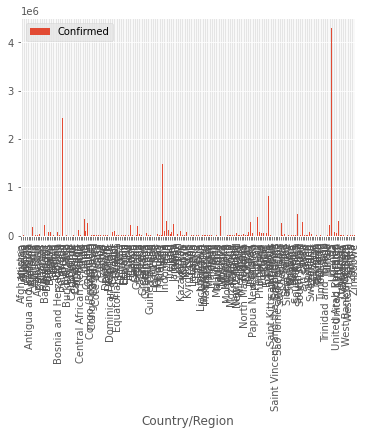

In [19]:
sub_frame.plot(kind='bar',x='Country/Region',y='Confirmed')

In [20]:
high_cases=Total_cases.head(10)
low_cases=Total_cases.tail(10)
high_cases,low_cases

#high_cases=high_cases.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).to_frame()
#high_cases
#low_cases=low_cases.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=True).to_frame()
#low_cases

(     Country/Region  Confirmed  Deaths  Recovered   Active
 173              US    4290259  148011    1325804  2816444
 23           Brazil    2442375   87618    1846641   508116
 79            India    1480073   33408     951166   495499
 138          Russia     816680   13334     602249   201097
 154    South Africa     452529    7067     274925   170537
 111          Mexico     395489   44022     303810    47657
 132            Peru     389717   18418     272547    98752
 35            Chile     347923    9187     319954    18782
 177  United Kingdom     301708   45844       1437   254427
 81             Iran     293606   15912     255144    22550,
             Country/Region  Confirmed  Deaths  Recovered  Active
 59                    Fiji         27       0         18       9
 141            Saint Lucia         24       0         22       2
 168            Timor-Leste         24       0          0      24
 69                 Grenada         23       0         23       0
 94      

<AxesSubplot:xlabel='Country/Region'>

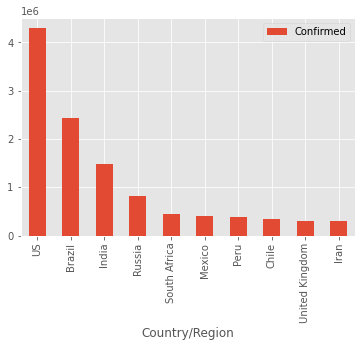

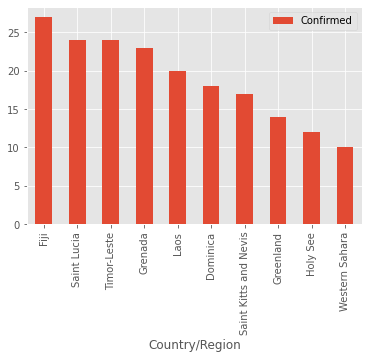

In [21]:
high_cases.plot(kind='bar',x='Country/Region',y='Confirmed')
low_cases.plot(kind='bar',x='Country/Region',y='Confirmed')

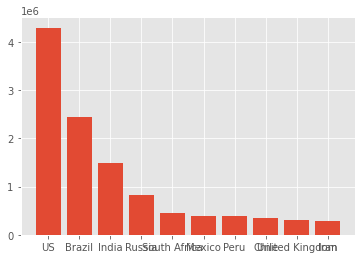

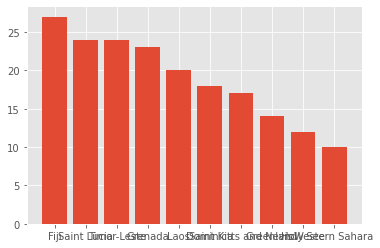

In [22]:
plt.bar(high_cases['Country/Region'],high_cases['Confirmed'])
plt.show()
plt.bar(low_cases['Country/Region'],low_cases['Confirmed'])
plt.show()

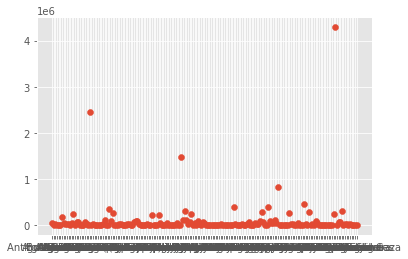

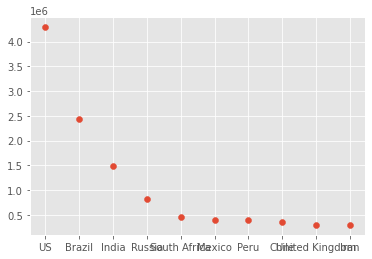

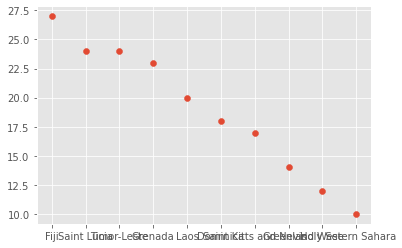

In [23]:
plt.scatter(df['Country/Region'],df['Confirmed'])
plt.show()
plt.scatter(high_cases['Country/Region'],high_cases['Confirmed'])
plt.show()
plt.scatter(low_cases['Country/Region'],low_cases['Confirmed'])
plt.show()

In [24]:
import plotly
plotly.__version__

'4.9.0'

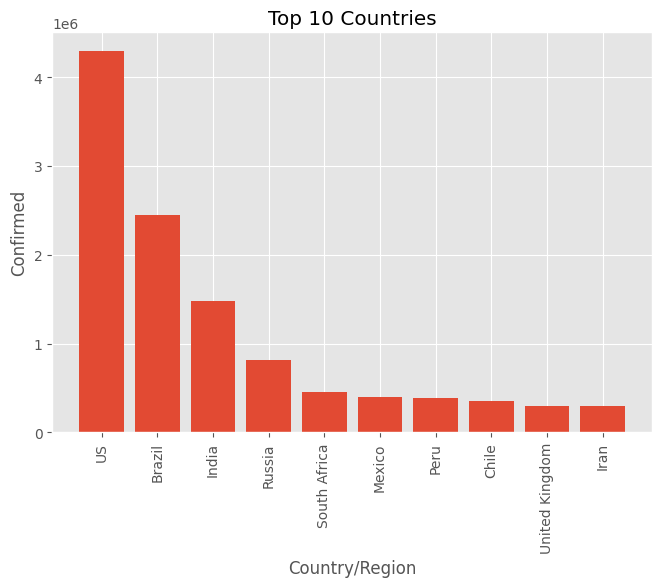

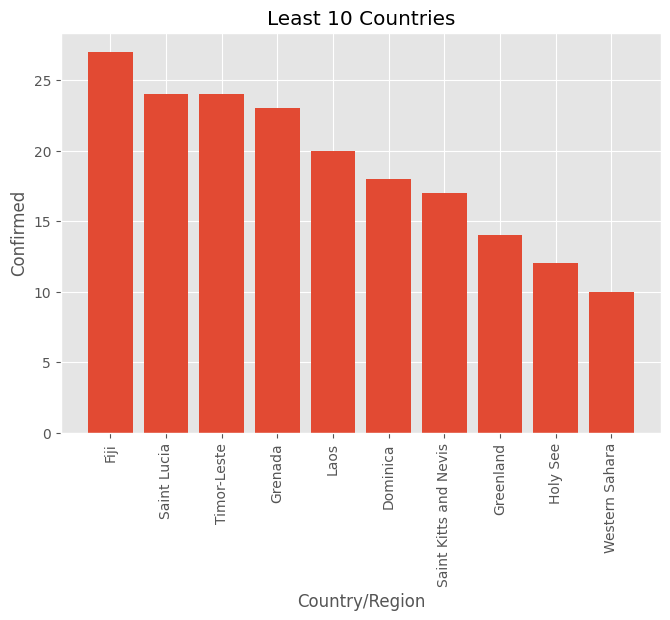

In [25]:
#fig=plt.figure(figsize=(20,10))
fig=plt.figure(dpi=100)
axes1=fig.add_axes([0,0,1,1])
axes1.bar(high_cases['Country/Region'],high_cases['Confirmed'])
axes1.set_title("Top 10 Countries")
axes1.set_xlabel("Country/Region")
axes1.set_ylabel("Confirmed")
plt.xticks(rotation=90)
plt.show()

fig=plt.figure(dpi=100)
axes1=fig.add_axes([0,0,1,1])
axes1.bar(low_cases['Country/Region'],low_cases['Confirmed'])
axes1.set_title("Least 10 Countries")
axes1.set_xlabel("Country/Region")
axes1.set_ylabel("Confirmed")
plt.xticks(rotation=90)
plt.show()

In [26]:
#fig=go.Figure()
#fig.add_trace(go.Bar(x=high_cases['Country/Region'],y=high_cases['Confirmed']))

In [27]:
Indian_Cord=pd.read_excel(r"C:\Data\Projects\Covid Analysis\Indian Coordinates.xlsx")

In [28]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df['Latitude'],df['Longitude'],df['Confirmed'],df['Country/Region']):
    folium.Marker([lat,long],radius=value*0.8,popup=('<strong>Country</strong>:'+str(name).capitalize()+'<br>''<strong>Confirmed Cases</strong>:'+str(value)+'<br>'),color='red',fill_color='red',fill_opacity=0.8).add_to(map)
print("Map Successfully Created")

Map Successfully Created


In [29]:
map
